# Predicting Economic Growth of Countries

# Abstract

Some of the code snippets taken from kaggle require the pandas adaptor for kagglehub which isn't available via conda. The following cell simply installs this

In [12]:
! pip install "kagglehub[pandas-datasets]"

We first load "Thyroid Cancer Risk" dataset from kaggle using kagglehub and the kagglehub pandas adaptor and save it to the variable ```df```. The dataset includes spaces in some of the headers and others not, which can be problematic when trying to reference these columns using pandas. To fix this, the column names have their whitespace stripped and overwritten. You can see the data set outputted belo

In [13]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# dataset and code as from [1]
file_path = "thyroid_cancer_risk_data.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bhargavchirumamilla/thyroid-cancer-risk-dataset",
  file_path,
)
# End of source [1]

# Code from [4]
device = "cpu"
print(f"Using {device} device")
torch.set_default_device(device)
# End of source [4]

# Remove unnecassary column
df = df.drop(columns="Patient_ID")
df


Using cpu device


,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


Check that there are no missing values in the dataset

In [14]:
df.isnull().sum().sum()

np.int64(0)

Encoding categorical data columns: "Gender", "Country", "Ethnicity", "Family_History", "Radiation_Exposure", "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes", "Thyroid_Cancer_Risk", "Diagnosis"

In [15]:
from sklearn.preprocessing import LabelEncoder

#Encode data
le = LabelEncoder()
encoded_df = df.copy()

columns = ["Gender", "Country", "Ethnicity", "Family_History", "Radiation_Exposure", "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes", "Thyroid_Cancer_Risk", "Diagnosis"]

for column in columns:
  encoded_df[column] = le.fit_transform(df[column])

encoded_df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,1,6,2,0,1,0,0,0,0,9.37,1.67,6.16,1.08,1,0
1,29,1,2,3,0,1,0,0,0,0,1.83,1.73,10.54,4.05,1,0
2,86,1,5,2,0,0,0,0,0,0,6.26,2.59,10.57,4.61,1,0
3,75,0,3,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,2,0
4,35,0,2,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,0,3,1,0,0,0,0,1,0,2.00,0.64,11.92,1.48,1,0
212687,89,1,4,4,0,0,0,0,1,0,9.77,3.25,7.30,4.46,2,0
212688,72,0,5,3,0,0,0,0,0,1,7.72,2.44,8.71,2.36,2,0
212689,85,0,0,4,0,0,0,0,0,1,5.62,2.53,9.62,1.54,2,0


/tmp/ipykernel_35083/972842239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['Thyroid_Cancer_Risk', 'Diagnosis']).size().unstack()


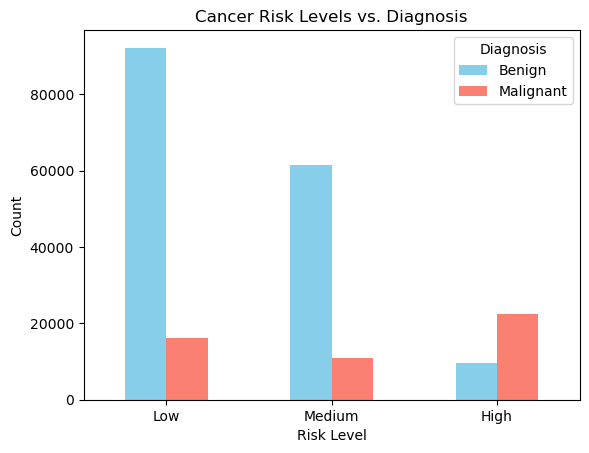

In [16]:
df['Thyroid_Cancer_Risk'] = pd.Categorical(df['Thyroid_Cancer_Risk'], categories=['Low', 'Medium', 'High'], ordered=True)
counts = df.groupby(['Thyroid_Cancer_Risk', 'Diagnosis']).size().unstack()
counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Cancer Risk Levels vs. Diagnosis')
plt.xticks(rotation=0)
plt.legend(title='Diagnosis')

                Feature    Chi2 Stat       P-value
14  Thyroid_Cancer_Risk  9608.660813  0.000000e+00
4        Family_History  2956.299276  0.000000e+00
3             Ethnicity  1990.222073  0.000000e+00
6     Iodine_Deficiency  1565.973944  0.000000e+00
5    Radiation_Exposure  1433.738538  0.000000e+00
2               Country   161.814823  4.540931e-37
10            TSH_Level     2.458406  1.168974e-01
9              Diabetes     1.761771  1.844038e-01
13          Nodule_Size     1.252263  2.631206e-01
11             T3_Level     0.454651  5.001344e-01
1                Gender     0.264209  6.072430e-01
8               Obesity     0.226356  6.342394e-01
12             T4_Level     0.178488  6.726762e-01
7               Smoking     0.126405  7.221894e-01
0                   Age     0.025448  8.732552e-01


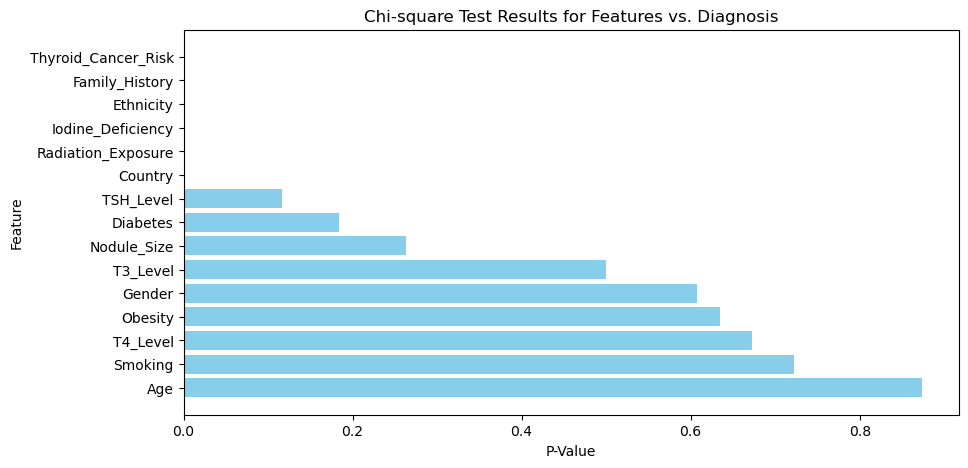

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

# Assume df is your DataFrame
X = encoded_df.drop(columns=['Diagnosis'])  # Features
y = encoded_df['Diagnosis']  # Target variable

# Perform chi2 test
chi2_stats, p_values = chi2(X, y)

# Store results in DataFrame
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Stat': chi2_stats, 'P-value': p_values})

# Sort by Chi2 Stat
chi2_df = chi2_df.sort_values(by='Chi2 Stat', ascending=False)

# Print results
print(chi2_df)

# Plot results
plt.figure(figsize=(10, 5))
plt.barh(chi2_df['Feature'], chi2_df['P-value'], color='skyblue')
plt.xlabel("P-Value")
plt.ylabel("Feature")
plt.title("Chi-square Test Results for Features vs. Diagnosis")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


split data

In [138]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize the DataFrame
normalised_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

features = encoded_df.drop(columns=["Diagnosis"])
normalised_features = scaler.fit_transform(features)
labels = encoded_df["Diagnosis"].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(normalised_features, labels, stratify=labels, test_size=0.2)


x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

apply machine learning

In [139]:
#Code from [2]
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.flatten = torch.nn.Flatten()
        self.connected_layers = torch.nn.Sequential(
            torch.nn.Linear(input_size, 2),
            torch.nn.ReLU(),
            torch.nn.Linear(2, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.flatten(x)
        output = self.connected_layers(x)
        return output

model = NeuralNetwork(x_train.shape[1]).to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)
losses = []
epochs = 300
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred.squeeze(), y_train)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()   
    print(f"epoch = {epoch}, loss = {loss}")
print("Done training!")
#End of source [2]


epoch = 0, loss = 0.8893396854400635
epoch = 1, loss = 0.8721582293510437
epoch = 2, loss = 0.8528197407722473
epoch = 3, loss = 0.8317047953605652
epoch = 4, loss = 0.8091441988945007
epoch = 5, loss = 0.7854235768318176
epoch = 6, loss = 0.7608245611190796
epoch = 7, loss = 0.7357469797134399
epoch = 8, loss = 0.7107096910476685
epoch = 9, loss = 0.6863152980804443
epoch = 10, loss = 0.663114070892334
epoch = 11, loss = 0.6415225863456726
epoch = 12, loss = 0.6218298673629761
epoch = 13, loss = 0.6042338013648987
epoch = 14, loss = 0.5888767838478088
epoch = 15, loss = 0.5758426785469055
epoch = 16, loss = 0.5651514530181885
epoch = 17, loss = 0.5567523837089539
epoch = 18, loss = 0.5505220890045166
epoch = 19, loss = 0.546266496181488
epoch = 20, loss = 0.5437287092208862
epoch = 21, loss = 0.5426018834114075
epoch = 22, loss = 0.542547345161438
epoch = 23, loss = 0.5432161688804626
epoch = 24, loss = 0.5442721247673035
epoch = 25, loss = 0.5454147458076477
epoch = 26, loss = 0.5463

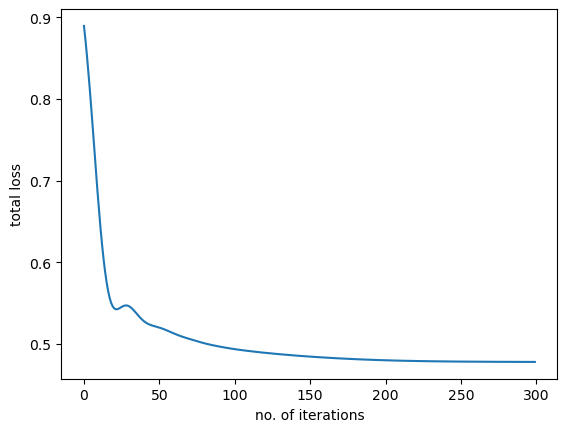

In [140]:
plt.plot(losses)
plt.xlabel("no. of iterations")
plt.ylabel("total loss")
plt.show()

Accuracy: 0.8196478486061096


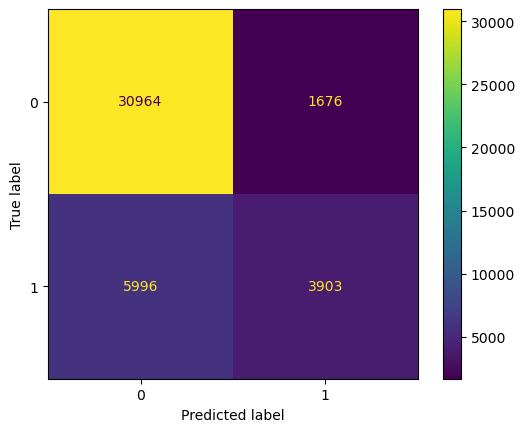

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

with torch.no_grad():
    y_pred = model(x_test)
    predicted_labels = (y_pred >= 0.5).float()  # Convert to 0.0/1.0
    accuracy = (predicted_labels.squeeze() == y_test).float().mean()
    print(f"Accuracy: {accuracy.item()}")

cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()
# End of [3]

# References
1. https://www.kaggle.com/datasets/bhargavchirumamilla/thyroid-cancer-risk-dataset
2. https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
3. https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_linear_regression/#building-model
4. https://pytorch.org/tutorials/beginner/pytorch_with_examples.html